In [ ]:
!pip install git+https://github.com/Ritvik19/pyradox.git

In [2]:
import keras
import numpy as np
from pyradox import modules

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [4]:
inputs = keras.Input(shape=(13,))
x = modules.DenselyConnected(32, activation='relu', batch_normalization=True, dropout=0.2)(inputs)
x = modules.DenselyConnected(8, activation='relu', batch_normalization=True, dropout=0.2)(x)
outputs = keras.layers.Dense(1)(x)

model = keras.models.Model(inputs=inputs, outputs=outputs) 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0   

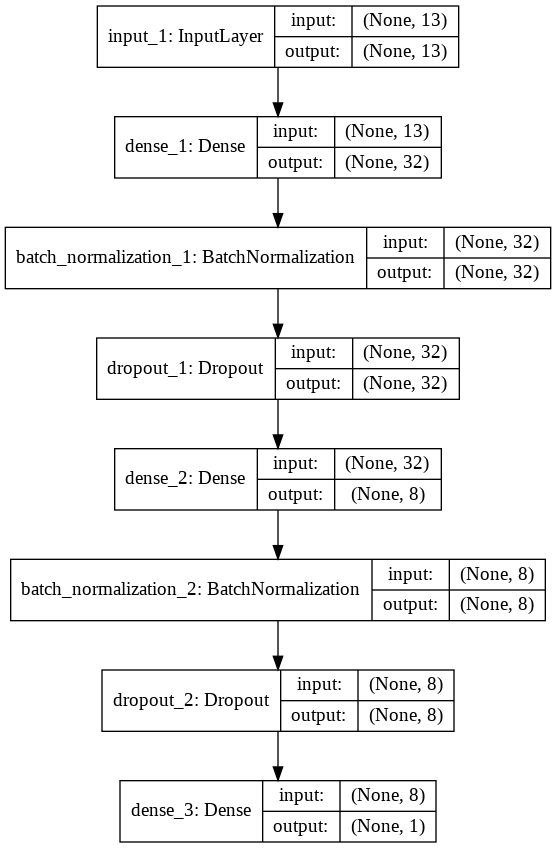

In [5]:
model.summary()
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/1
404/404 [==============================] - 1s 2ms/step - loss: 584.6406 - val_loss: 551.4216
